#### IMPORTING THE NECESSARY LIBRARIES:

In [1]:
!sudo apt-get install python3.9

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support
  python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support python3.9
  python3.9-minimal
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,284 kB of archives.
After this operation, 19.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.20-1+jammy1 [837 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minima

In [2]:
!pip install yfinance

In [3]:
import re
import pylab as p
import numpy as np
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

import yfinance as yf

#importing packages for the prediction of time-series data
import statsmodels.api as smapi
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')
plot.style.use('seaborn-v0_8-poster')

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

''

# Preprocessing the data

In [5]:
#IMPORTING THE DATA
import yfinance as yf

# Fetch historical data for Bitcoin using yfinance
df = yf.download('BTC-USD', start='2017-04-01', end='2023-05-01')

# Resetting index and converting to a DataFrame
df.reset_index(inplace=True)

# Displaying the first few rows to check the data
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                       Date    Adj Close        Close         High  \
Ticker                                BTC-USD      BTC-USD      BTC-USD   
0      2017-04-01 00:00:00+00:00  1080.500000  1080.500000  1091.719971   
1      2017-04-02 00:00:00+00:00  1102.170044  1102.170044  1107.589966   
2      2017-04-03 00:00:00+00:00  1143.810059  1143.810059  1151.739990   
3      2017-04-04 00:00:00+00:00  1133.250000  1133.250000  1156.439941   
4      2017-04-05 00:00:00+00:00  1124.780029  1124.780029  1135.089966   

Price           Low         Open     Volume  
Ticker      BTC-USD      BTC-USD    BTC-USD  
0       1061.089966  1071.709961  289633984  
1       1075.449951  1080.609985  514187008  
2       1102.949951  1102.949951  580444032  
3       1120.520020  1145.520020  436310016  
4       1113.630005  1134.140015  414784000  


In [6]:
from IPython import display

# Display the DataFrame
display.display(df)

# Adjust the output height to 300px.
display.Javascript("google.colab.output.setIframeHeight('300px');")

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2017-04-01 00:00:00+00:00,1080.500000,1080.500000,1091.719971,1061.089966,1071.709961,289633984
1,2017-04-02 00:00:00+00:00,1102.170044,1102.170044,1107.589966,1075.449951,1080.609985,514187008
2,2017-04-03 00:00:00+00:00,1143.810059,1143.810059,1151.739990,1102.949951,1102.949951,580444032
3,2017-04-04 00:00:00+00:00,1133.250000,1133.250000,1156.439941,1120.520020,1145.520020,436310016
4,2017-04-05 00:00:00+00:00,1124.780029,1124.780029,1135.089966,1113.630005,1134.140015,414784000
...,...,...,...,...,...,...,...
2216,2023-04-26 00:00:00+00:00,28422.701172,28422.701172,29995.837891,27324.548828,28300.058594,31854242019
2217,2023-04-27 00:00:00+00:00,29473.787109,29473.787109,29871.546875,28402.886719,28428.464844,27153445027
2218,2023-04-28 00:00:00+00:00,29340.261719,29340.261719,29572.791016,28929.609375,29481.013672,17544464887


<IPython.core.display.Javascript object>

In [7]:
data = df['Close']
Date = df['Date']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   (Date, )              2221 non-null   datetime64[ns, UTC]
 1   (Adj Close, BTC-USD)  2221 non-null   float64            
 2   (Close, BTC-USD)      2221 non-null   float64            
 3   (High, BTC-USD)       2221 non-null   float64            
 4   (Low, BTC-USD)        2221 non-null   float64            
 5   (Open, BTC-USD)       2221 non-null   float64            
 6   (Volume, BTC-USD)     2221 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 121.6 KB
None


In [8]:
print(data)

Ticker       BTC-USD
0        1080.500000
1        1102.170044
2        1143.810059
3        1133.250000
4        1124.780029
...              ...
2216    28422.701172
2217    29473.787109
2218    29340.261719
2219    29248.488281
2220    29268.806641

[2221 rows x 1 columns]


In [9]:
train = df[['Date','Close']]
# train = train.resample('M').mean()
print(train.tail())

Price                       Date         Close
Ticker                                 BTC-USD
2216   2023-04-26 00:00:00+00:00  28422.701172
2217   2023-04-27 00:00:00+00:00  29473.787109
2218   2023-04-28 00:00:00+00:00  29340.261719
2219   2023-04-29 00:00:00+00:00  29248.488281
2220   2023-04-30 00:00:00+00:00  29268.806641


## Setting the Date as Index

In [10]:

train_set = train.set_index('Date')
train_set.sort_index(ascending=True, inplace=True)

print (type(train_set))

print (train_set.head())

<class 'pandas.core.frame.DataFrame'>
Price                            Close
Ticker                         BTC-USD
Date                                  
2017-04-01 00:00:00+00:00  1080.500000
2017-04-02 00:00:00+00:00  1102.170044
2017-04-03 00:00:00+00:00  1143.810059
2017-04-04 00:00:00+00:00  1133.250000
2017-04-05 00:00:00+00:00  1124.780029


# Date Visualisation

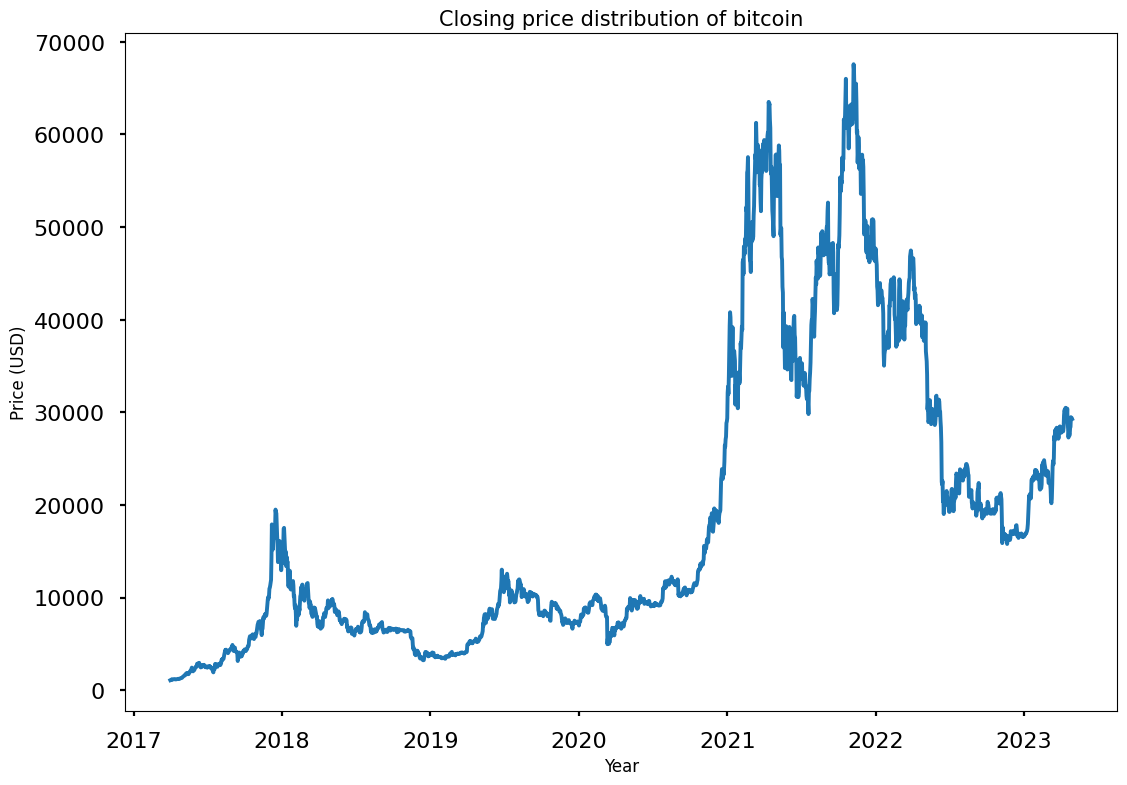

In [11]:
plot.plot(train_set)
plot.xlabel('Year', fontsize=12)
plot.ylabel('Price (USD)', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

# AUGMENTED_DICKY_FULLER_TEST

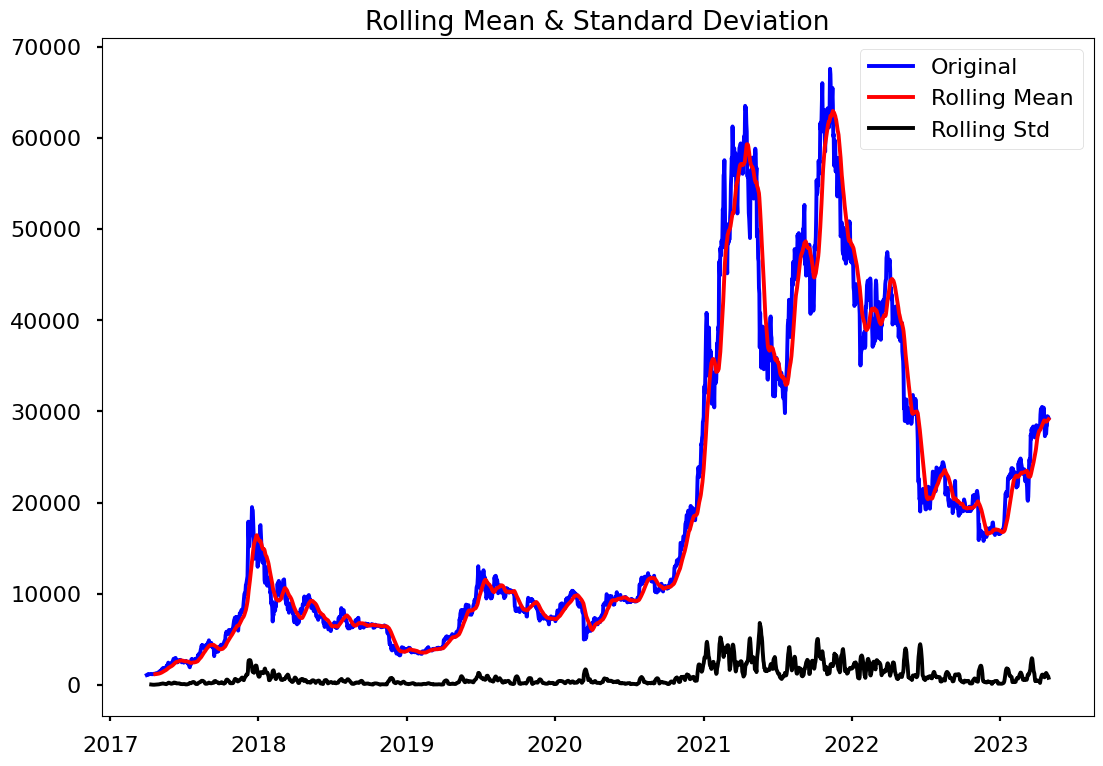

ADF Stastistic: -1.663091
p-value: 0.450223
The data is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [12]:
from statsmodels.tsa.stattools import adfuller

def AUGMENTED_DICKY_FULLER_TEST(x):
    #rolling stats
    rol_mean = x.rolling(window=22,center=False).mean()
    rol_std = x.rolling(window=12,center=False).std()

    #rolling stats:
    orignal = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rol_mean, color='red', label='Rolling Mean')
    std = plot.plot(rol_std, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)

    #Perform DICKY_FULLER_TEST
    result = adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue = result[1]

    for key,value in result[4].items():
         if result[0]>value:
            print("The data is non stationery")
            break
         else:
            print("The data is stationery")
            break;

    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

AUGMENTED_DICKY_FULLER_TEST(train_set['Close'])

# Making time series stationary
# Taking log transformation

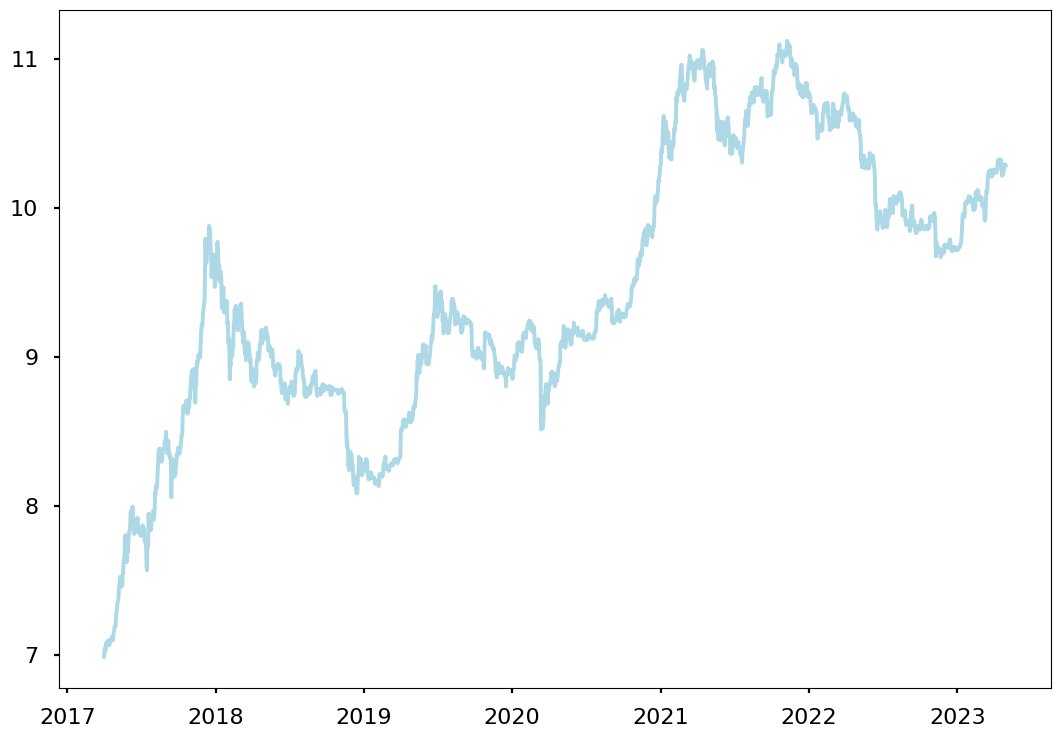

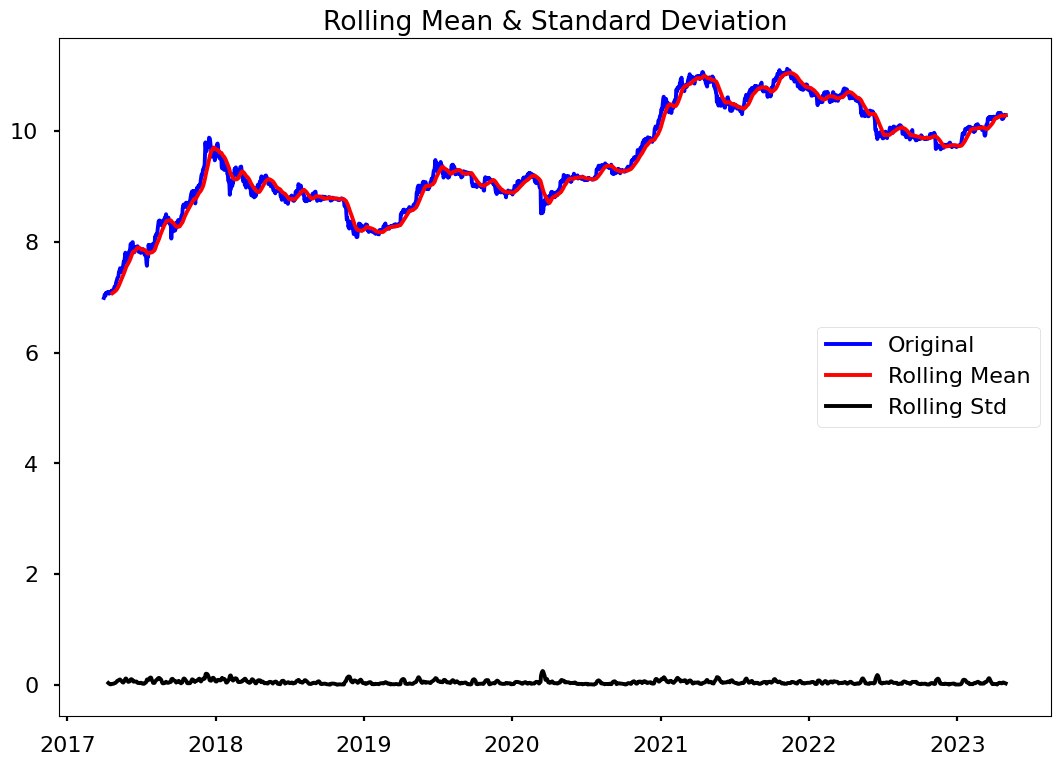

ADF Stastistic: -2.479672
p-value: 0.120499
The data is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [13]:
train_log = np.log(train_set['Close'])
plot.plot(train_log,color="lightblue")
plot.show()

AUGMENTED_DICKY_FULLER_TEST(train_log)

# Seasonality & Trends:

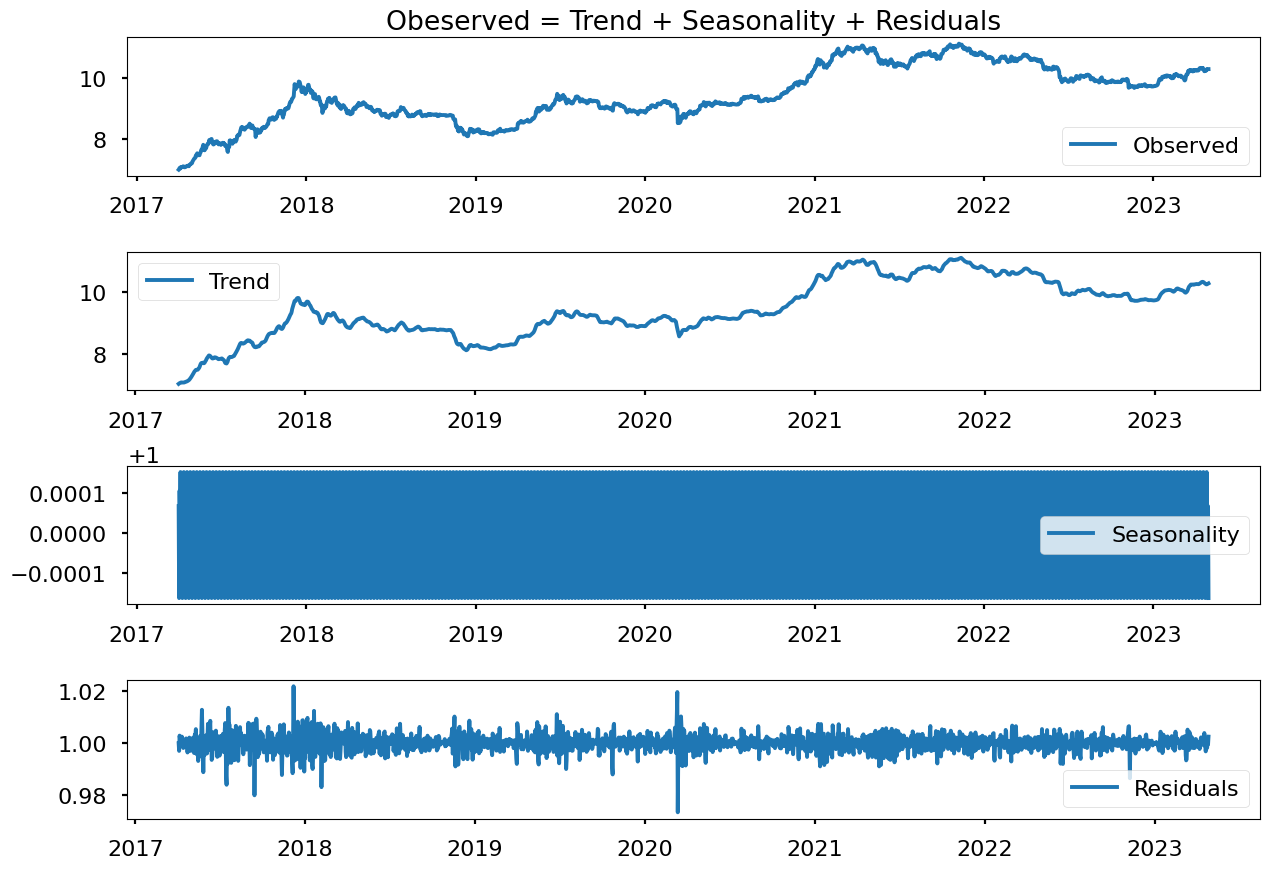

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_log , model='multiplicative')

trends = decomposition.trend
seasonals = decomposition.seasonal
residuals = decomposition.resid


plot.subplot(411)
plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(train_log ,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trends, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonals,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residuals, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

# Remove trend and seasonality with differencing

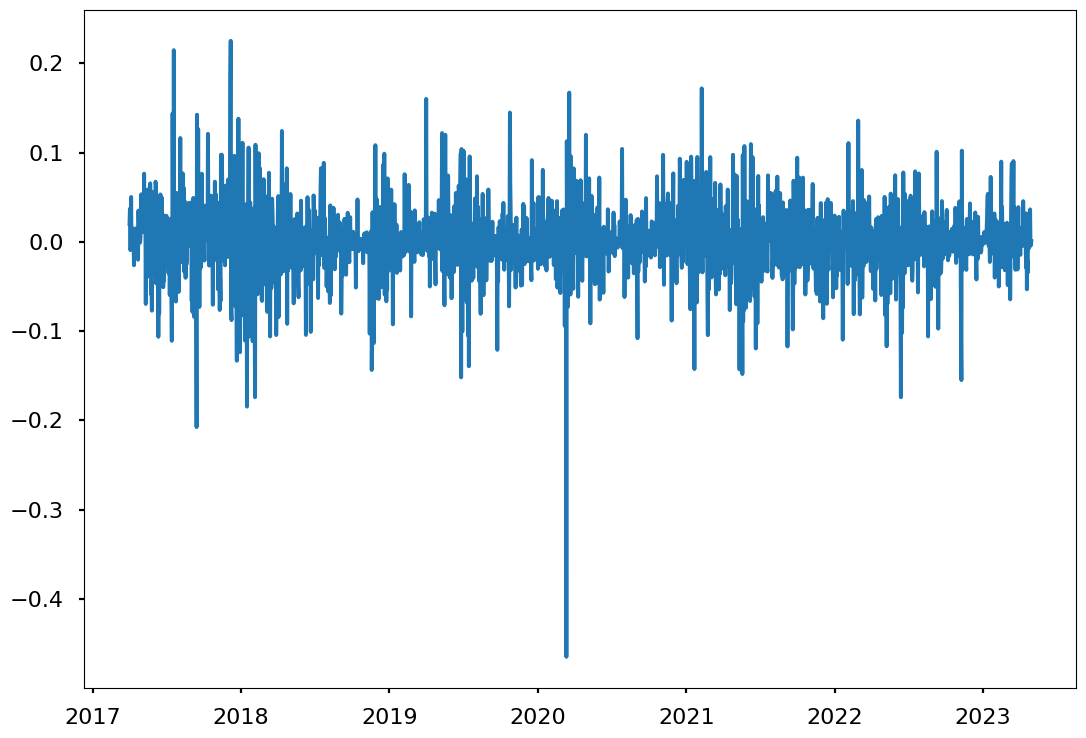

In [15]:

train_log_diff = train_log  - train_log .shift()
plot.plot(train_log_diff)
plot.show()

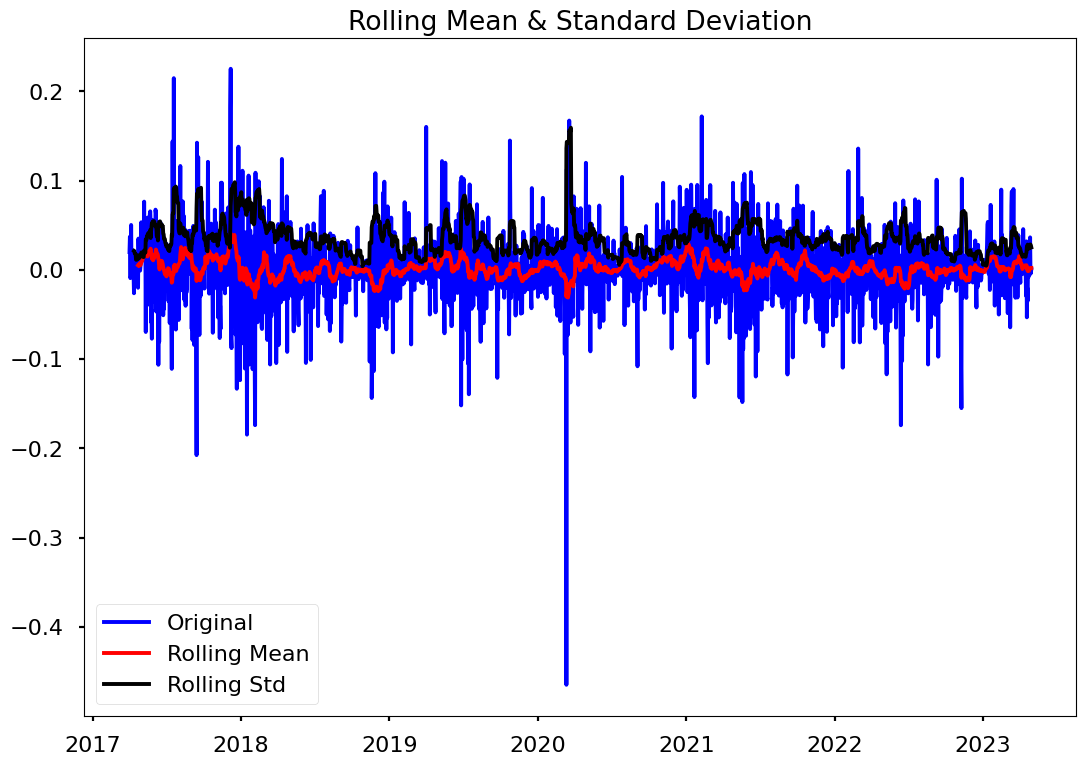

ADF Stastistic: -32.465390
p-value: 0.000000
The data is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [16]:
train_log_diff.dropna(inplace=True)
AUGMENTED_DICKY_FULLER_TEST(train_log_diff)

# Plot the autocorreltaion and partial auto correlation functions

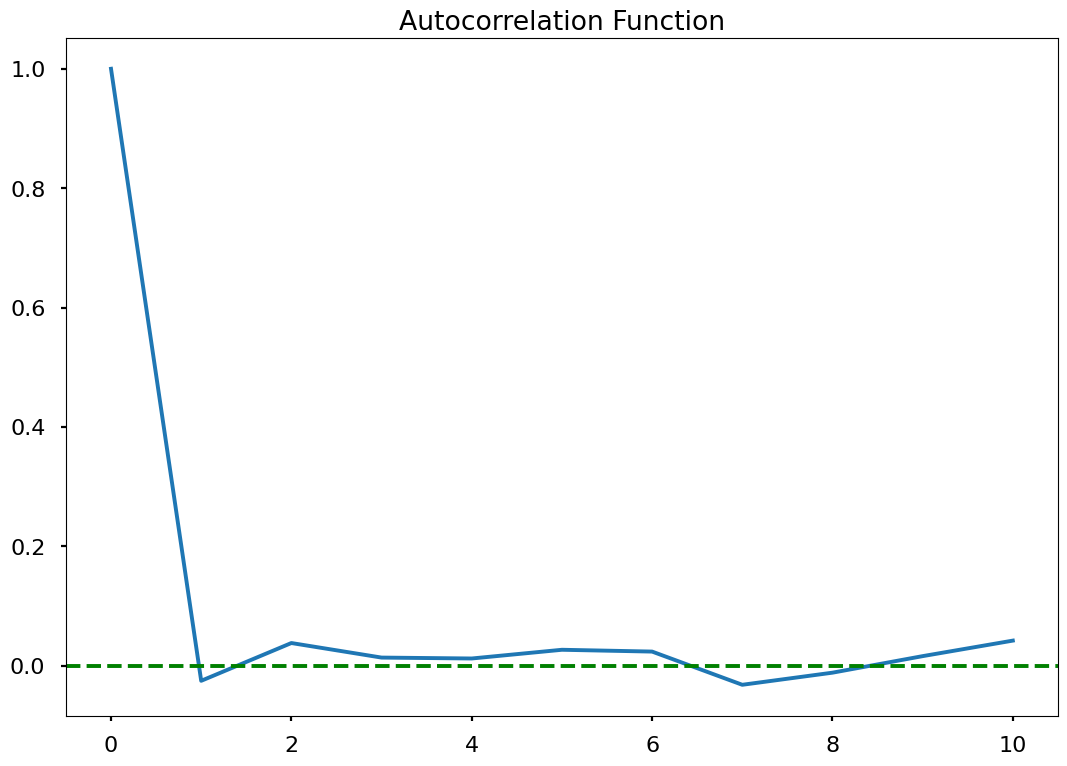

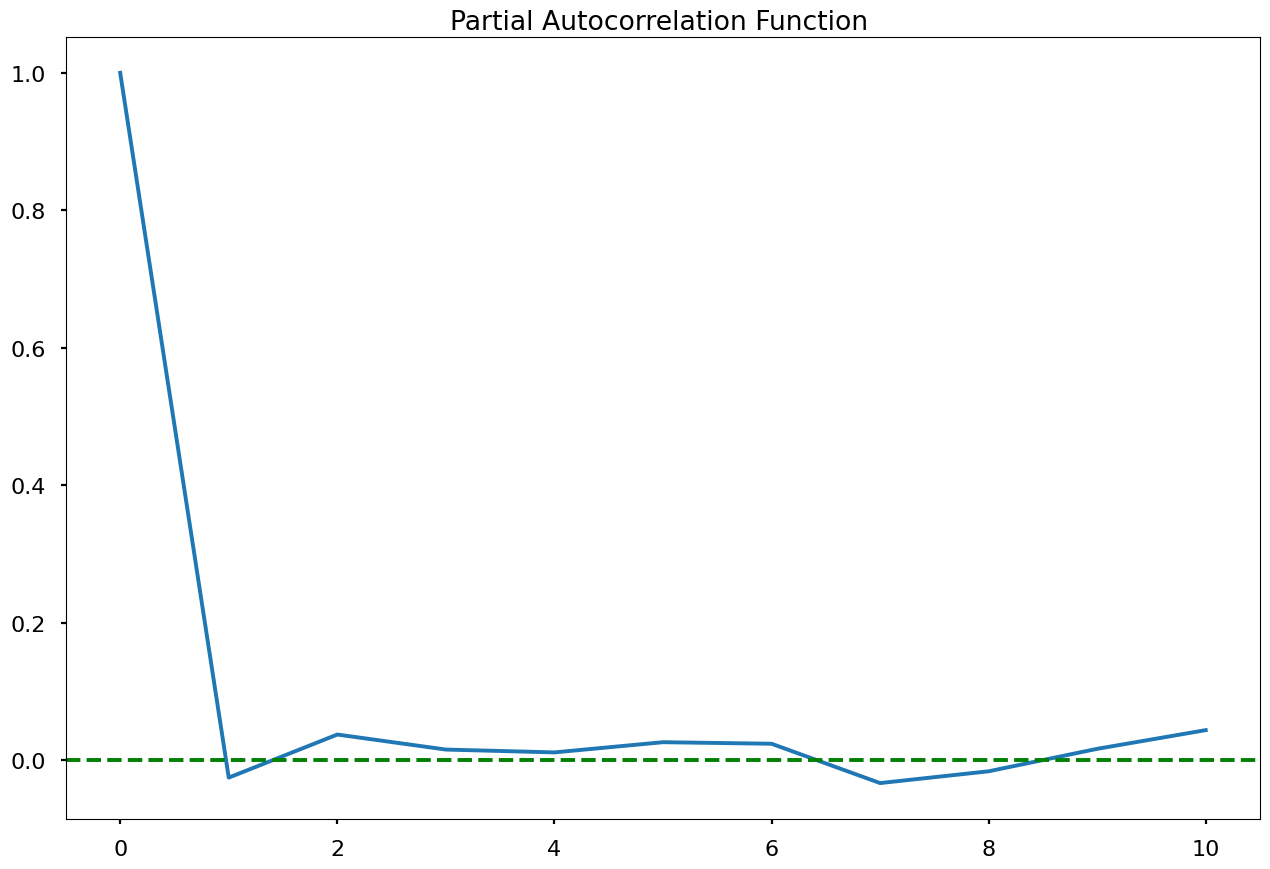

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

acf_lag = acf(train_log_diff, nlags=10)
pacf_lag = pacf(train_log_diff, nlags=10, method='ols')

#Plot Acf
plot.subplot(1,1,1)
plot.plot(acf_lag)

plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(pacf_lag)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.show()

# AR MODEL

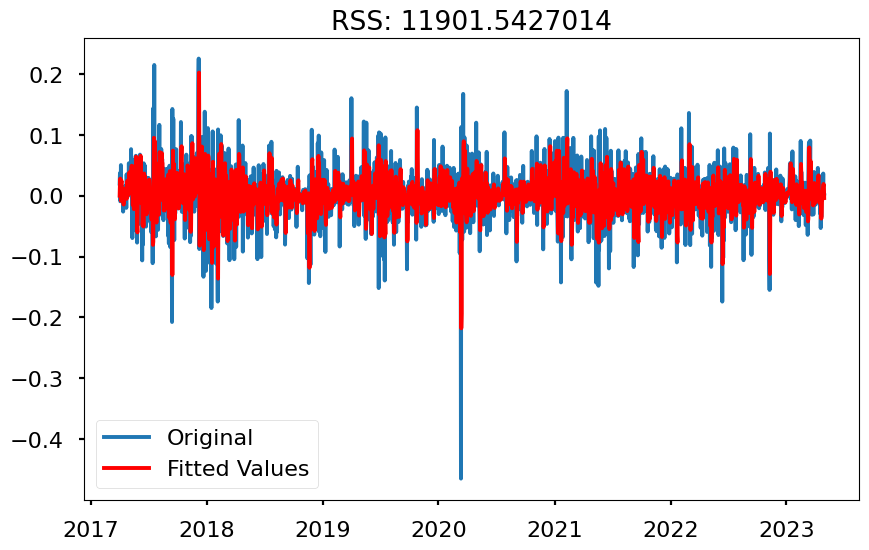

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure both series have matching indices and align
fitted_values = results_AR.fittedvalues.reindex(train_log_diff.index)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((fitted_values.values - train_log_diff.values) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_log_diff, label='Original')
plt.plot(fitted_values, color='red', label='Fitted Values')
plt.title(f'RSS: {rss:.7f}')
plt.legend()
plt.show()


In [20]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 2220
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3549.590
Date:                Tue, 12 Nov 2024   AIC                          -7095.179
Time:                        01:05:01   BIC                          -7083.770
Sample:                    04-02-2017   HQIC                         -7091.012
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5309      0.010    -51.498      0.000      -0.551      -0.511
sigma2         0.0024   3.48e-05     68.657      0.000       0.002       0.002
Ljung-Box (L1) (Q):                  69.38   Jarque-

In [ ]:
# dir(results_ARIMA)
# results_ARIMA.fittedvalues
# results_ARIMA.fittedvalues-train_log_diff
# type(train_log_diff)
# train_log_diff
# a = train_log_diff.dropna()
# b = results_ARIMA.fittedvalues.dropna()
# b-a
results_AR.fittedvalues-train_log_diff


Date
2017-04-02   -0.019857
2017-04-03   -0.017227
2017-04-04    0.037210
2017-04-05    0.022848
2017-04-06   -0.058639
                ...   
2023-04-27   -0.019527
2023-04-28    0.023723
2023-04-29    0.020289
2023-04-30   -0.004575
2023-05-01    0.039715
Length: 2221, dtype: float64

# Moving Average (MA) Model

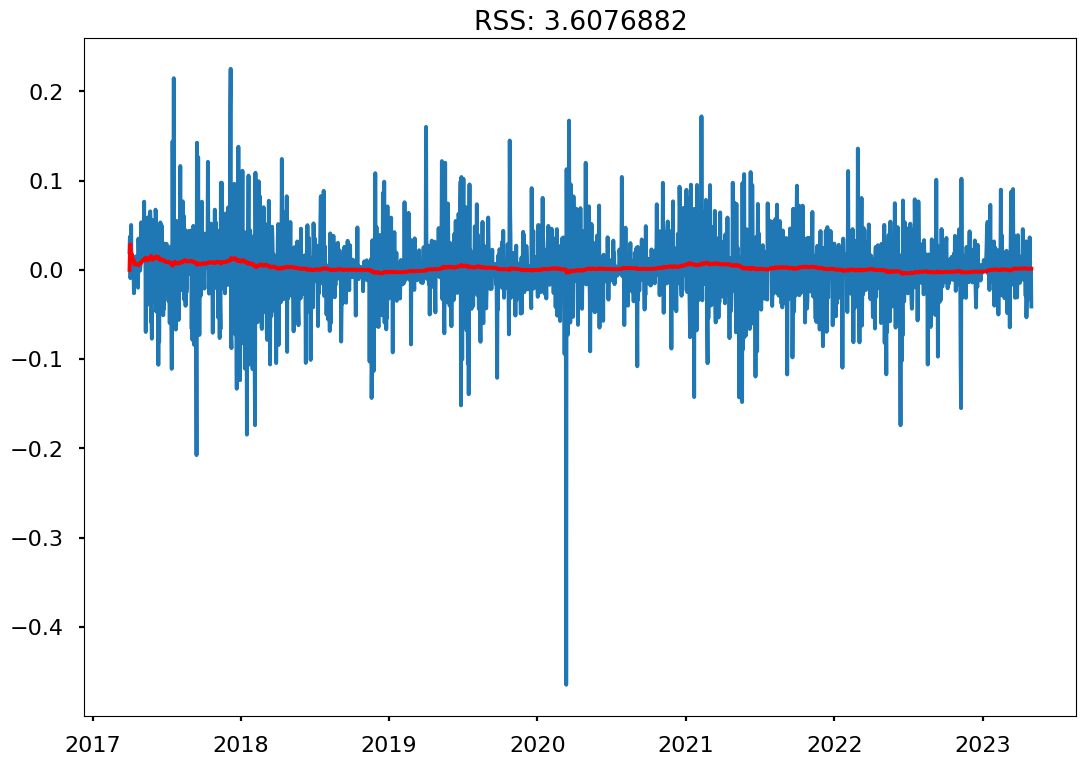

In [ ]:

model = smapi.tsa.arima.ARIMA(train_log_diff, order=(0,1,1))
results_MA = model.fit()

plot.plot(train_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues - train_log_diff)**2))
plot.show()

In [ ]:
print(results_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2221
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3977.723
Date:                Sat, 06 May 2023   AIC                          -7951.446
Time:                        14:47:59   BIC                          -7940.036
Sample:                    04-02-2017   HQIC                         -7947.278
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9937      0.002   -419.299      0.000      -0.998      -0.989
sigma2         0.0016   1.93e-05     83.891      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   2.20   Jarque-

# ARIMA MODEL

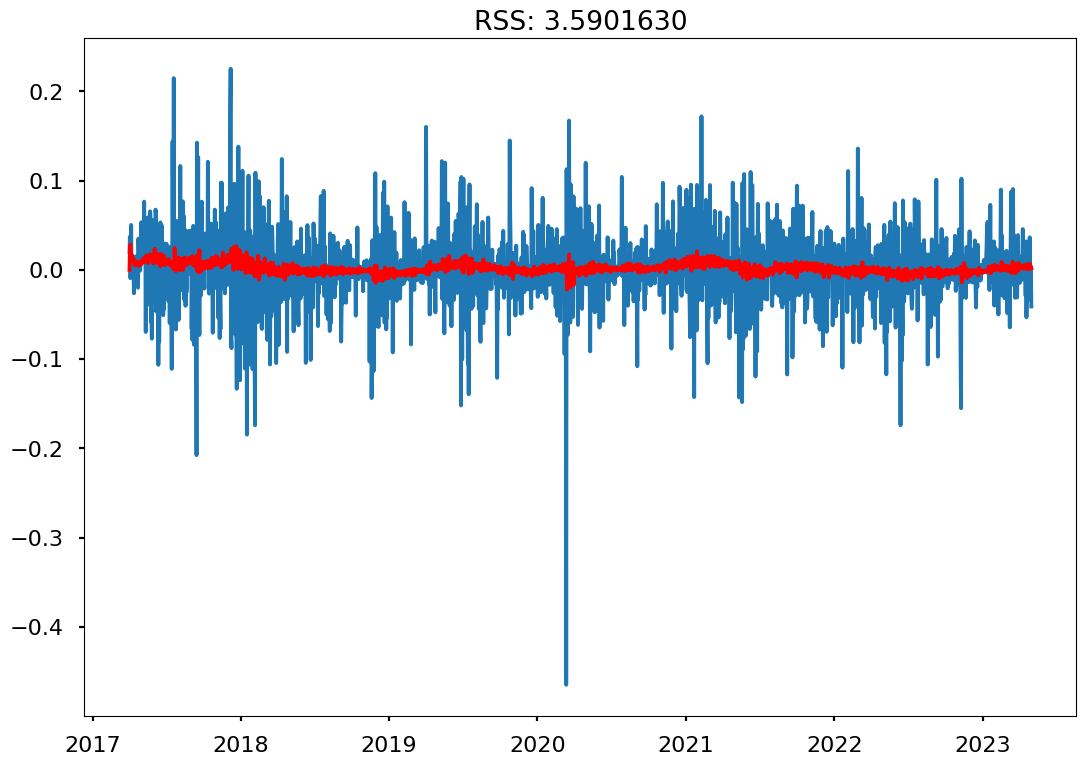

In [ ]:
# ARIMA MODEL
# from statsmodels.tsa.arima.model import ARIMA
model = smapi.tsa.arima.ARIMA(train_log_diff, order=(11,1, 5))
results_ARIMA = model.fit()

plot.plot(train_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues - train_log_diff) **2))
plot.show()

In [ ]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2221
Model:                ARIMA(11, 1, 5)   Log Likelihood                3983.015
Date:                Sat, 06 May 2023   AIC                          -7932.031
Time:                        14:48:22   BIC                          -7835.041
Sample:                    04-02-2017   HQIC                         -7896.606
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1950      0.773     -1.547      0.122      -2.709       0.319
ar.L2         -1.0831      0.732     -1.479      0.139      -2.519       0.352
ar.L3         -0.8489      0.492     -1.725      0.0

# Result

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

size = int(len(train_log)-100)
train_arima, test_arima = train_log[0:size], train_log[size:len(train_log)]

history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
  model = smapi.tsa.arima.ARIMA(history, order=(2, 1, 0))
  model_fit = model.fit()

  output = model_fit.forecast()
  pred_value = output[0]

  original_val = test_arima[t]
  history.append(original_val)

  pred_val = np.exp(pred_value)
  original_val = np.exp(original_val)

  error = ((abs(pred_val - original_val)) / original_val) * 100
  error_list.append(error)
  print('Predicted Price = %f,   Original Price = %f,   error = %f ' % (pred_val, original_val, error), '%')

  predictions.append(float(pred_val))
  originals.append(float(original_val))

print('\n Means Error in Predicting Bitcoin Prices : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


Predicted Price = 22837.870264,   Original Price = 22720.415629,   error = 0.516956  %
Predicted Price = 22725.632929,   Original Price = 22934.431464,   error = 0.910415  %
Predicted Price = 22926.972171,   Original Price = 22636.469311,   error = 1.283340  %
Predicted Price = 22651.770909,   Original Price = 23117.859682,   error = 2.016142  %
Predicted Price = 23094.435846,   Original Price = 23032.777599,   error = 0.267698  %
Predicted Price = 23053.213640,   Original Price = 23078.727880,   error = 0.110553  %
Predicted Price = 23074.373706,   Original Price = 23031.089776,   error = 0.187937  %
Predicted Price = 23034.001532,   Original Price = 23774.565923,   error = 3.114944  %
Predicted Price = 23754.047417,   Original Price = 22840.138907,   error = 4.001326  %
Predicted Price = 22890.623729,   Original Price = 23139.283910,   error = 1.074623  %
Predicted Price = 23096.527262,   Original Price = 23723.769653,   error = 2.643941  %


# Expected Vs Predicted Price

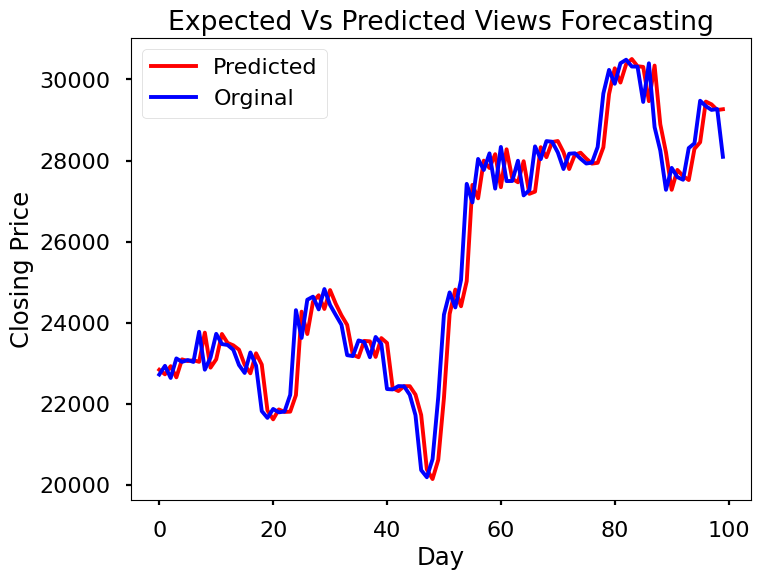

In [ ]:
plot.figure(figsize=(8, 6))
test = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test, predictions, color= 'red')
plot.plot(test, originals, color = 'blue')
plot.title('Expected Vs Predicted Price ')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()